In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def van_der_pol(t,y,mu=1):
    return [y[1], mu*(1 - y[0]**2)*y[1] - y[0]]

def arenstorf(t, y, mu=0.012277471):
    mup = 1-mu 
    D1 = ((y[0]+mu)**2 + y[1]**2)**(3/2)
    D2 = ((y[0]-mup)**2 + y[1]**2)**(3/2)
    return [
        y[2],
        y[3],
        y[0] + 2*y[3] - mup*(y[0]+mu)/D1 - mu*(y[0]-mup)/D2,
        y[1] - 2*y[2] - mup*y[1]/D1 - mu*y[1]/D2
    ]

10.0,1e-06,RK45: 0.2867262363433838
10.0,1e-06,LSODA: 0.12300562858581543
10.0,1e-09,RK45: 0.9112725257873535
10.0,1e-09,LSODA: 0.2954137325286865
10.0,1e-12,RK45: 3.50872802734375
10.0,1e-12,LSODA: 0.49660778045654297


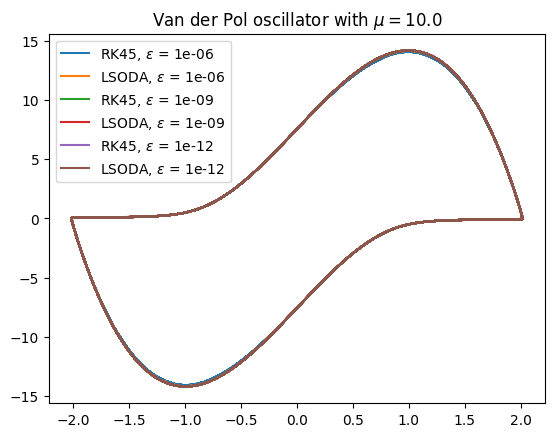

100.0,1e-06,RK45: 1.3522911071777344
100.0,1e-06,LSODA: 0.022422075271606445
100.0,1e-09,RK45: 1.462981939315796
100.0,1e-09,LSODA: 0.04887056350708008
100.0,1e-12,RK45: 2.934094190597534
100.0,1e-12,LSODA: 0.09346675872802734


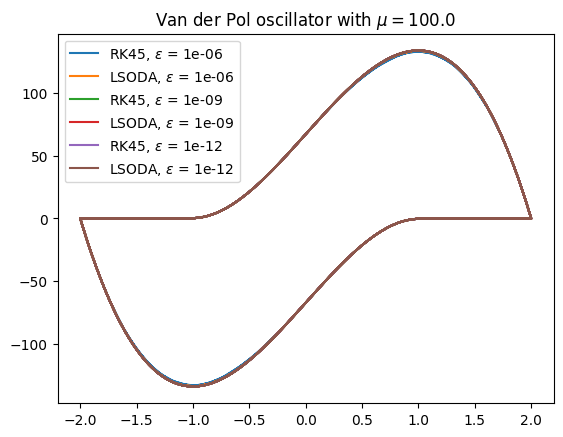

1000.0,1e-06,RK45: 14.511762380599976
1000.0,1e-06,LSODA: 0.0031168460845947266
1000.0,1e-09,RK45: 14.423384666442871
1000.0,1e-09,LSODA: 0.006326913833618164
1000.0,1e-12,RK45: 14.538151502609253
1000.0,1e-12,LSODA: 0.013497352600097656


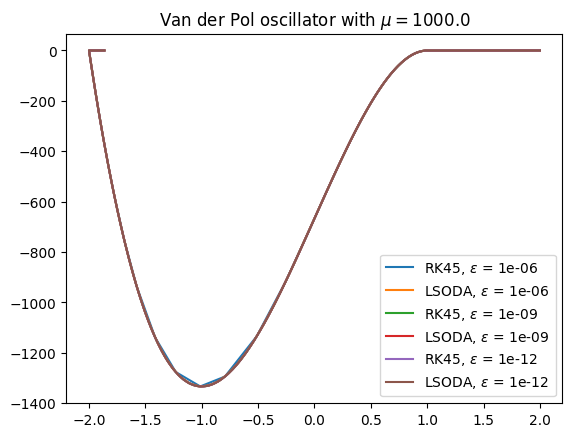

In [22]:


tmax=1000.0
times = {}
for mu in [1e1,1e2,1e3]:
    fig,ax = plt.subplots()
    plt.title(f'Van der Pol oscillator with $\mu = {mu}$')
    for eps in [1e-6,1e-9,1e-12]:
        for method in ['RK45','LSODA']:
            start_time = time.time()
            sol = solve_ivp(van_der_pol,[0,tmax],[2,0],args=(mu,),method=method,rtol=eps,atol=eps)
            end_time = time.time()
            times[f'{mu},{eps},{method}'] = end_time-start_time
            print(f'{mu},{eps},{method}: {end_time-start_time}')
            ax.plot(sol.y[0], sol.y[1], label=f'{method}, $\epsilon$ = {eps}')

            # plt.plot(sol.t, sol.y[0])
            # print(np.min(sol.y))
    plt.legend()
    plt.show()

# plt.xlim([-3,3])

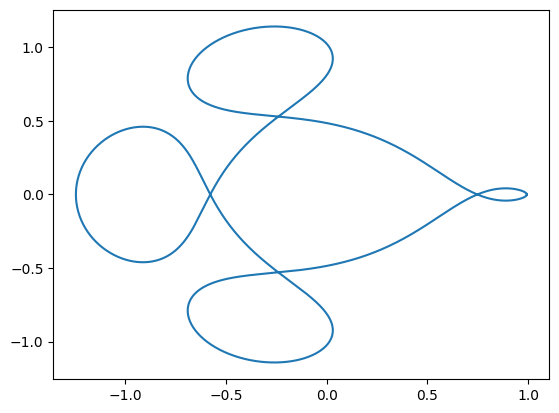

In [11]:


y0 = [.994,0,0,-2.001585106]

tmax = 17.06521656
# tmax = 100
eps = 1e-12
mu=0.012277471
sol = solve_ivp(arenstorf,t_span=[0,tmax],y0=y0,method='RK45',rtol=eps,atol=eps)

plt.plot(sol.y[0],sol.y[1])

RK45 took 0.32410120964050293 seconds


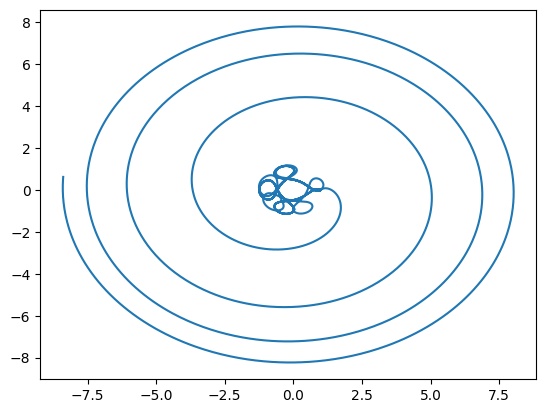

DOP853 took 0.10052037239074707 seconds


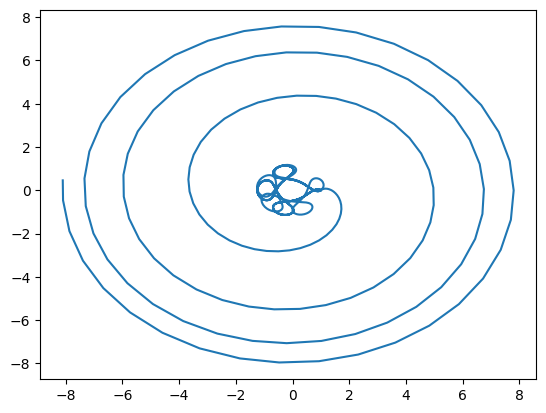

Radau took 4.595433950424194 seconds


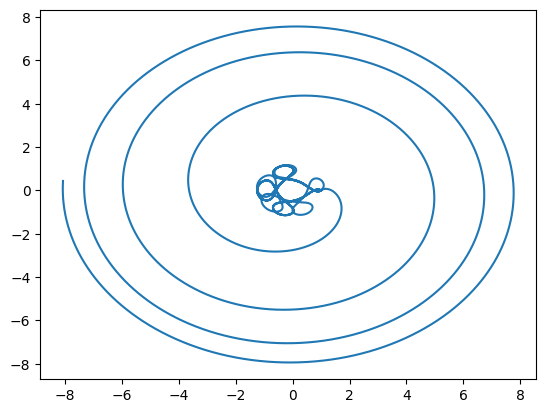

In [24]:

y0 = np.array([.994,0,0,-2.001585106])

# tmax = 17.06521656
tmax = 100.0
eps = 1.0e-12
mu= 0.012277471
times = {}
for method in ['RK45','DOP853','Radau']:
    start_time = time.time()
    sol = solve_ivp(arenstorf,t_span=[0,tmax],y0=y0,method=method,args=(mu,),rtol=eps,atol=eps)
    end_time = time.time()
    print(f'{method} took {end_time-start_time} seconds')
    times[method] = end_time-start_time
    plt.plot(sol.y[0],sol.y[1])
    plt.show()

In [11]:
def R2RAS(R = lambda z : 1 + z + 0.5*z*z,cmap='Blues',label='R'):
    nx = 100
    ny = 160
    x = np.linspace(-4,1,nx)
    y = np.linspace(-4,4,ny)
    xg,yg = np.meshgrid(x,y)

    z = xg + 1j*yg 
    f = R(z)
    absf = (f.real)**2 + (f.imag)**2

    plt.rcParams.update({'font.size': 22})
    
    con = plt.contourf(xg,yg,absf,np.arange(2), cmap=cmap, alpha=0.1)
    plt.contour(xg,yg,absf,np.arange(2), cmap=cmap)  
    plt.plot([], [], color=cmap[:-1], label=label)
    plt.title("RAS")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    # plt.colorbar(con, label=label, orientation='vertical')
    ax.set_aspect(1)
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    # plt.show()

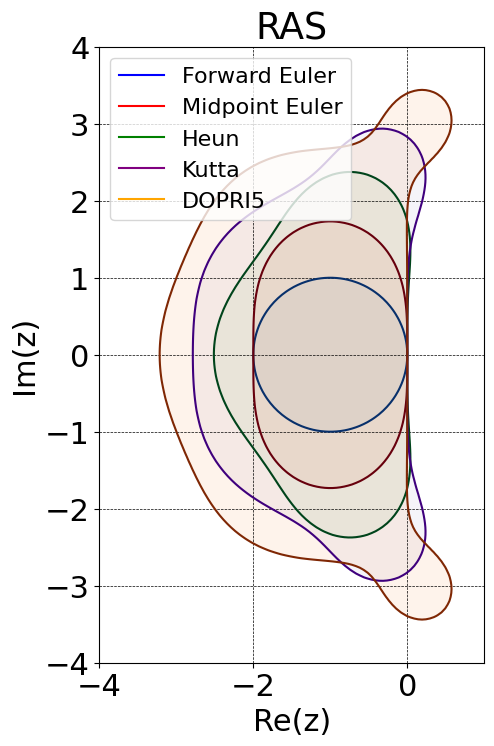

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

R_euler = lambda z : 1 + z 

R2RAS(R_euler,cmap='Blues',label='Forward Euler')

R_mdpt_euler = lambda z : 1 + z + 0.5*z**2

R2RAS(R_mdpt_euler,cmap='Reds',label='Midpoint Euler')

R_heun = lambda z : 1 + z + 0.5*z**2 + (z**3)/6

R2RAS(R_heun,cmap='Greens',label='Heun')

R_kutta = lambda z : 1 + z + 0.5*z**2 + (z**3)/6 + (z**4)/24 

R2RAS(R_kutta,cmap='Purples',label='Kutta')

R_DOPRI5 = lambda z : 1 + z + 0.5*z**2 + (z**3)/6 + (z**4)/24 + (z**5)/120

R2RAS(R_DOPRI5,cmap='Oranges',label='DOPRI5')

plt.legend(loc='upper left',fontsize=16)
plt.show()